# Homework 4 - Due on Wed Nov 21st.

## Load all packages that we potentially need.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
%matplotlib inline

ModuleNotFoundError: No module named 'graphviz'

In [8]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Load the Hitters data.

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

In [9]:
hittersdf = pd.read_csv('Hitters.csv').dropna()
hittersdf.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


### We are interested in predicting a ball player's salary.

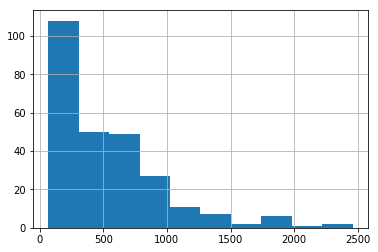

In [10]:
hittersdf.Salary.hist();

**Practical trick: From the histogram, you can see a very skewed distribution - making it hard to build a prediction/regression model. We can try to predict** ***log(Salary)***

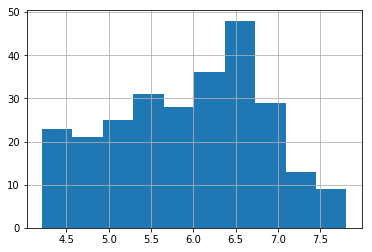

In [11]:
np.log(hittersdf.Salary).hist();

## 1. [20 pts] Let's focus on features: 'Years' and 'Hits' and build Regression Trees

**Build a full-blown regression tree using all data and evaluate the R^2 of all training data (using .score). **
- X is ['Years','Hits']
- y is 'Salary'

In [13]:
X = hittersdf[['Years', 'Hits']]
y = hittersdf['Salary']

In [14]:
regr = DecisionTreeRegressor()
regr.fit(X,y)
regr.score(X,y)

0.9986493937870748

### Visualize the resulting regression tree.

### Compare your results with using y = log(Salary)

## 2. [20 pts] From Problem 1, your trees can be very complex, probably too complex for 2 input features. Try a couple ways to simplify your trees (both Salary and log(Salary) predictions). 

## 3. [20 pts] Evaluate generalization performance using cross-validation for both Salary and log(Salary) prediction. 

- Which target is easier to predict? why?
- Which variables are important?

## 4. [20 pts] What happens if we pre-prune the trees by controling the depth of the trees? Optimize the depth of the trees using a ``for-loop`` and ``cross_val_score`` using MSE and R^2.

Comparison of the **training, testing, and cross-validation errors (RMSE)** for trees with ``different depths of the trees``. 

**Plot to show if we can identify the optimal depth.**

Comparison of the **training, testing, and cross-validation errors (``R^2``)** for trees with ``different depths of the trees``. 

**Do we find the optimal depth to be the same?**

## 5. [20 pts] Use Decision Tree and Random Forests to train ``all features`` to predict log(Salary) and rank the variable importance.

**Check the types of variables**

In [ ]:
hittersdf.info()

**Convert all non-numerical features into numerical features.**

**Let's compare decision trees and random forests side-by-side.**